In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()

In [4]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_data[0],train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [6]:
import matplotlib.pyplot as plt

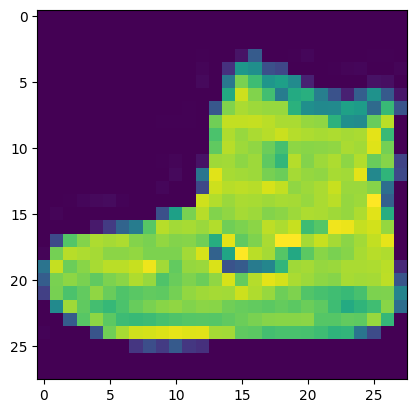

In [7]:
plt.imshow(train_data[0])

In [8]:
print(train_label[0])

9


In [9]:
# As labels are in numbers so we will convert them first in human readable form
class_names=['T-shirt/Top','Trouser','Pull over','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle-boots']

In [10]:
class_names[train_label[0]]

'Ankle-boots'

Text(0.5, 1.0, 'T-shirt/Top')

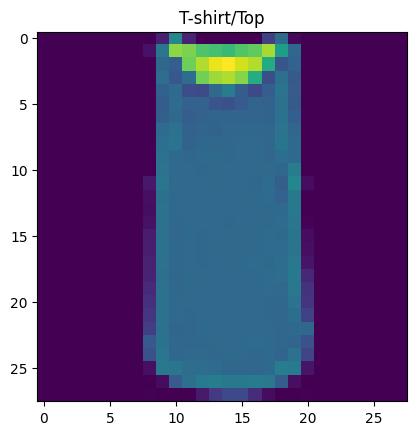

In [11]:
# Plotting now an example with its understandable label
plt.imshow(train_data[2])
plt.title(class_names[train_label[2]])

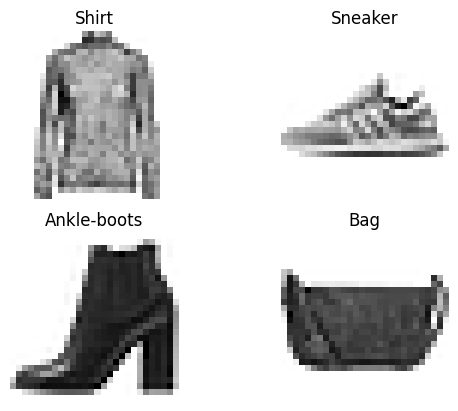

In [12]:
# Creating a random function that displays images randomly
import random

for i in range(4):
    plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_label[rand_index]])
    plt.axis('off')

**Make A Multiclass classification model now**
> Points to remember :
* final activation as softmax
* No of units of final layer should be equal to number of classes
> Things to focus on when facing shape error:
* you can add a Flatterned layers
* check loss function sparse for numeric labels and categorical for one hot encoded ones
* check input and output shapes


In [13]:
# set seed
tf.random.set_seed(42)

# Model Creation
multi_classification_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
multi_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                                   metrics=['accuracy'])

In [14]:
non_norm_history=multi_classification_model.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0999 - loss: 2.3485 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0997 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0996 - loss: 2.314

**Lets now train on One hot encoded labels**

In [15]:
test_label[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [16]:
test_label_oh_encoded=tf.one_hot(test_label,depth=10)
train_label_oh_encoded=tf.one_hot(train_label,depth=10)

In [17]:
test_label_oh_encoded[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

In [18]:
# Model for working with one hot encoded labels
tf.random.set_seed(42)
multi_oh_class_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
multi_oh_class_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Categotical for one hot labels
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
non_norm_history_oh=multi_oh_class_model.fit(train_data,train_label_oh_encoded,epochs=10,validation_data=(test_data,test_label_oh_encoded))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2052 - loss: 2.0902 - val_accuracy: 0.3499 - val_loss: 1.7205
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3751 - loss: 1.5408 - val_accuracy: 0.3980 - val_loss: 1.4475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4094 - loss: 1.3726 - val_accuracy: 0.4380 - val_loss: 1.3876
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4514 - loss: 1.2854 - val_accuracy: 0.4714 - val_loss: 1.2628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4985 - loss: 1.2343 - val_accuracy: 0.5399 - val_loss: 1.2299
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5353 - loss: 1.1685 - val_accuracy: 0.5604 - val_loss: 1.1652
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5508 - loss: 1.1325 - val_accuracy: 0.5627 - val_loss: 1.1293
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5640 - loss: 1.097

In [19]:
multi_classification_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

**Lets Improve the models Performance by Normalization**

In [20]:
print(train_data.min())
print(train_data.max())

0
255


In [21]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [22]:
tf.random.set_seed(42)
normed_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
normed_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [23]:
norm_history=normed_model.fit(train_data_norm,train_label,epochs=10,validation_data=(test_data_norm,test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6034 - loss: 1.0840 - val_accuracy: 0.7313 - val_loss: 0.7731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7553 - loss: 0.6966 - val_accuracy: 0.7661 - val_loss: 0.6637
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7756 - loss: 0.6301 - val_accuracy: 0.7795 - val_loss: 0.6317
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7858 - loss: 0.6039 - val_accuracy: 0.7868 - val_loss: 0.6149
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7922 - loss: 0.5874 - val_accuracy: 0.7902 - val_loss: 0.6027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7970 - loss: 0.5753 - val_accuracy: 0.7919 - val_loss: 0.5937
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8003 - loss: 0.5657 - val_accuracy: 0.7939 - val_loss: 0.5858
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8038 - loss: 0

**Comparing Noramlaized and non Normalized Data**

<Axes: title={'center': 'Normalized Data'}>

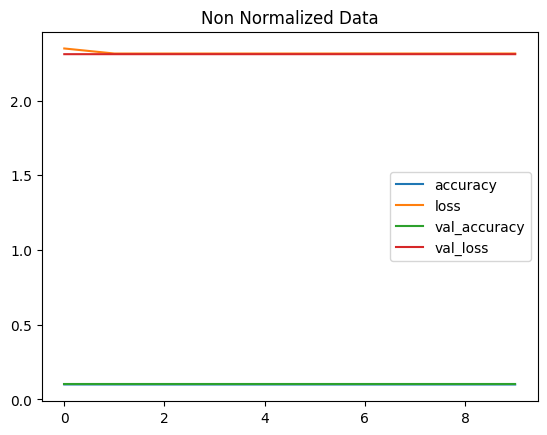

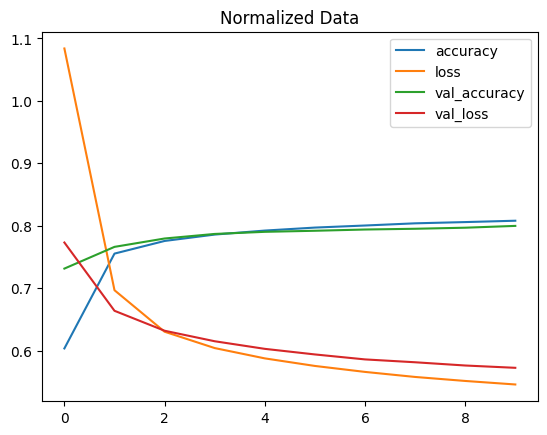

In [25]:
import pandas as pd 
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized Data")
pd.DataFrame(norm_history.history).plot(title='Normalized Data')

**Finding ideal Learning Rate**

In [29]:
tf.random.set_seed(42)
model_lr_find=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_lr_find.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
find_lr_history=model_lr_find.fit(train_data_norm,train_label,epochs=40,validation_data=(test_data_norm,test_label),callbacks=[lr_schedular])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6548 - loss: 0.9692 - val_accuracy: 0.7519 - val_loss: 0.7152 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7717 - loss: 0.6459 - val_accuracy: 0.7729 - val_loss: 0.6433 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7830 - loss: 0.6016 - val_accuracy: 0.7814 - val_loss: 0.6110 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7894 - loss: 0.5823 - val_accuracy: 0.7877 - val_loss: 0.5942 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7940 - loss: 0.5691 - val_accuracy: 0.7928 - val_loss: 0.5800 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8025 - loss: 0.5530 - val_accuracy: 0.8021 - val_loss: 0.5647 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8

Text(0.5, 1.0, 'Finding ideal Learning rate')

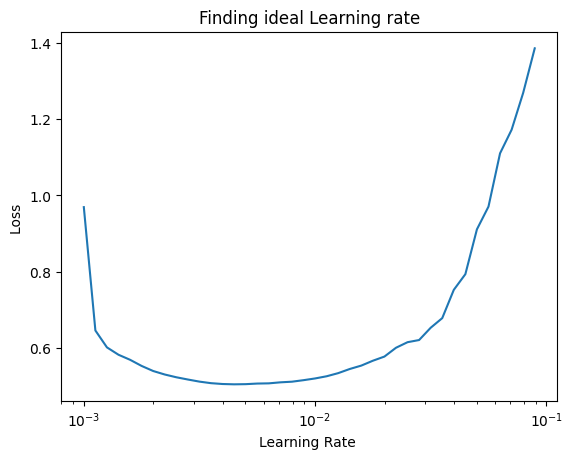

In [31]:
# Learning rate decay graph
lrs=1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel("Learning Rate ")
plt.ylabel("Loss ")
plt.title('Finding ideal Learning rate')

In [32]:
10**-3

0.001

In [33]:
# as ideal lr is 0.001 so refit the model
tf.random.set_seed(42)
model_new=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_new.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(0.001),
                      metrics=['accuracy'])
ideal_lr_history=model_new.fit(train_data_norm,train_label,epochs=20,validation_data=(test_data_norm,test_label))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6480 - loss: 0.9659 - val_accuracy: 0.7408 - val_loss: 0.7218
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7601 - loss: 0.6696 - val_accuracy: 0.7657 - val_loss: 0.6547
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7738 - loss: 0.6270 - val_accuracy: 0.7741 - val_loss: 0.6336
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7800 - loss: 0.6078 - val_accuracy: 0.7783 - val_loss: 0.6215
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7844 - loss: 0.5957 - val_accuracy: 0.7801 - val_loss: 0.6155
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7871 - loss: 0.5872 - val_accuracy: 0.7800 - val_loss: 0.6116
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7889 - loss: 0.5809 - val_accuracy: 0.7807 - val_loss: 0.6093
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7905 - loss: 0.5